In [2]:
import pandas as pd
import requests
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import shotchartdetail
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


# In[20]:


career = playercareerstats.PlayerCareerStats(player_id = '203081')
df = career.get_data_frames()[0]
df


# In[21]:


df.iloc[[7,8,10],:]


# In[22]:


dam_season_stats = df.iloc[[7,8,10],:].copy()


In [3]:
# Add in columns for some advanced statistics

dam_season_stats['PPG'] = (dam_season_stats['PTS'] / dam_season_stats['GP']).round(2)
dam_season_stats['TS%'] = ((dam_season_stats['PTS'] / (2*(dam_season_stats['FGA']+0.44*dam_season_stats['FTA'])))*100).round()
dam_season_stats['EFG%'] = ((dam_season_stats['FGM']+0.5*dam_season_stats['FG3M'])/dam_season_stats['FGA']*100).round(2)
dam_season_stats['APG'] = (dam_season_stats['AST'] / dam_season_stats['GP']).round(2)
dam_season_stats['SPG'] = (dam_season_stats['STL'] / dam_season_stats['GP']).round(2)
dam_season_stats.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PPG', 'TS%', 'EFG%', 'APG', 'SPG'],
      dtype='object')

In [4]:
dam_season_stats[['MIN','FGM','FT_PCT','OREB','REB','AST','STL','BLK','TOV','APG','SPG','FG_PCT','FG3_PCT','PTS','PPG','TS%','EFG%']].mean(axis=0).round(2)

MIN        2326.33
FGM         594.00
FT_PCT        0.91
OREB         36.33
REB         281.33
AST         486.67
STL          60.67
BLK          19.00
TOV         196.00
APG           7.63
SPG           0.95
FG_PCT        0.46
FG3_PCT       0.39
PTS        1924.00
PPG          30.31
TS%          63.00
EFG%         56.03
dtype: float64

In [5]:
#2019-20 shotchartdata
shotchartdata_2019 = shotchartdetail.ShotChartDetail(team_id=1610612757, player_id=203081, season_type_all_star='Regular Season', season_nullable='2019-20', context_measure_simple='FGA').get_data_frames()
shotchartdata_2019[0]

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021900013,22,203081,Damian Lillard,1610612757,Portland Trail Blazers,1,10,25,...,Center(C),Less Than 8 ft.,5,58,-5,1,0,20191023,POR,DEN
1,Shot Chart Detail,0021900013,46,203081,Damian Lillard,1610612757,Portland Trail Blazers,1,8,42,...,Left Side(L),24+ ft.,23,-232,-9,1,0,20191023,POR,DEN
2,Shot Chart Detail,0021900013,145,203081,Damian Lillard,1610612757,Portland Trail Blazers,1,2,44,...,Center(C),Less Than 8 ft.,0,-3,8,1,1,20191023,POR,DEN
3,Shot Chart Detail,0021900013,295,203081,Damian Lillard,1610612757,Portland Trail Blazers,2,4,22,...,Center(C),24+ ft.,24,-52,244,1,0,20191023,POR,DEN
4,Shot Chart Detail,0021900013,305,203081,Damian Lillard,1610612757,Portland Trail Blazers,2,3,8,...,Left Side Center(LC),16-24 ft.,19,-105,159,1,1,20191023,POR,DEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,Shot Chart Detail,0021901309,554,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,9,32,...,Left Side Center(LC),24+ ft.,26,-119,236,1,1,20200813,BKN,POR
1345,Shot Chart Detail,0021901309,560,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,8,31,...,Center(C),Less Than 8 ft.,5,-46,38,1,0,20200813,BKN,POR
1346,Shot Chart Detail,0021901309,581,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,7,12,...,Center(C),24+ ft.,27,65,268,1,1,20200813,BKN,POR
1347,Shot Chart Detail,0021901309,612,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,4,34,...,Left Side Center(LC),24+ ft.,29,-149,249,1,0,20200813,BKN,POR


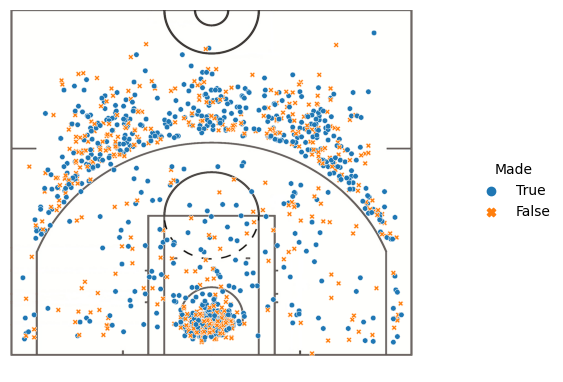

In [6]:
shotchartdata_2019 = shotchartdata_2019[0]
shotchartdata_2019
    
court_img = mpimg.imread(r'C:\Users\natha\Desktop\Data Analysis\nba_court.jpg')

def shot_chart(df, **kwargs):
    
    g = sns.relplot(data=shotchartdata_2019,x='LOC_X', y='LOC_Y', kind='scatter', facet_kws={'legend_out': True}, **kwargs)
    
    # title
    new_title = 'Made'
    g._legend.set_title(new_title)
    # replace labels
    new_labels = ['True', 'False']
    for t, l in zip(g._legend.texts, new_labels):
        t.set_text(l)
        
    g.set(xlim=(-250, 250), ylim=(-50,400), yticks=[], xticks=[],
         xlabel=None, ylabel=None)
    g.despine(left=True, bottom=True)

    for ax in g.fig.axes:
        ax.imshow(court_img, zorder=0, extent=[-250, 250, -30, 400])

        return g

shot_chart(shotchartdata_2019, hue='SHOT_MADE_FLAG', style='SHOT_MADE_FLAG', s=15)

In [7]:
#2020-21 shotchartdata
shotchartdata_2020 = shotchartdetail.ShotChartDetail(team_id=1610612757, player_id=203081, season_type_all_star='Regular Season', season_nullable='2020-21', context_measure_simple='FGA').get_data_frames()
shotchartdata_2020[0]
shotchartdata_2020 = shotchartdata_2020[0]

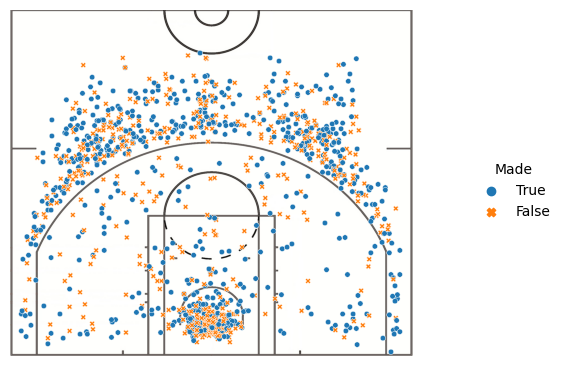

In [8]:
def shot_chart(df, **kwargs):
    
    g = sns.relplot(data=shotchartdata_2020,x='LOC_X', y='LOC_Y', kind='scatter', facet_kws={'legend_out': True}, **kwargs)
    
    # title
    new_title = 'Made'
    g._legend.set_title(new_title)
    # replace labels
    new_labels = ['True', 'False']
    for t, l in zip(g._legend.texts, new_labels):
        t.set_text(l)
        
    g.set(xlim=(-250, 250), ylim=(-50,400), yticks=[], xticks=[],
         xlabel=None, ylabel=None)
    g.despine(left=True, bottom=True)

    for ax in g.fig.axes:
        ax.imshow(court_img, zorder=0, extent=[-250, 250, -30, 400])

        return g

shot_chart(shotchartdata_2020, hue='SHOT_MADE_FLAG', style='SHOT_MADE_FLAG', s=15)

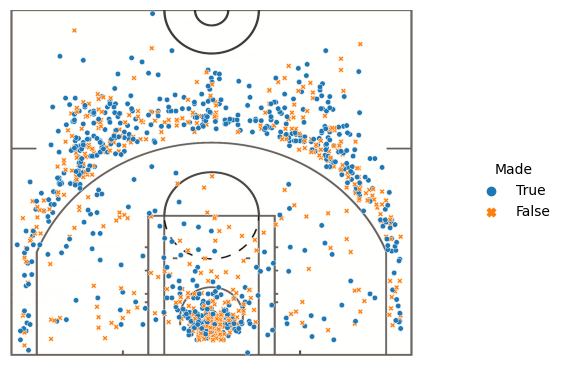

In [9]:
#2022-23 shotchartdata
shotchartdata_2022 = shotchartdetail.ShotChartDetail(team_id=1610612757, player_id=203081, season_type_all_star='Regular Season', season_nullable='2022-23', context_measure_simple='FGA').get_data_frames()
shotchartdata_2022[0]
shotchartdata_2022 = shotchartdata_2022[0]

def shot_chart(df, **kwargs):
    
    g = sns.relplot(data=shotchartdata_2022,x='LOC_X', y='LOC_Y', kind='scatter', facet_kws={'legend_out': True}, **kwargs)
    
    # title
    new_title = 'Made'
    g._legend.set_title(new_title)
    # replace labels
    new_labels = ['True', 'False']
    for t, l in zip(g._legend.texts, new_labels):
        t.set_text(l)
        
    g.set(xlim=(-250, 250), ylim=(-50,400), yticks=[], xticks=[],
         xlabel=None, ylabel=None)
    g.despine(left=True, bottom=True)

    for ax in g.fig.axes:
        ax.imshow(court_img, zorder=0, extent=[-250, 250, -30, 400])

        return g

shot_chart(shotchartdata_2022, hue='SHOT_MADE_FLAG', style='SHOT_MADE_FLAG', s=15)

In [16]:
#shotchartdata for clutch shot in the 3 last seasons
shotchartdata_2019_23_clutch = shotchartdetail.ShotChartDetail(team_id=1610612757, player_id=203081, season_type_all_star='Regular Season', season_nullable=('2019-20','2020-21','2022-23'), clutch_time_nullable= 'Last 3 Minutes', point_diff_nullable= 5, context_measure_simple='FGA').get_data_frames()
shotchartdata_2019_23_clutch = shotchartdata_2019_23_clutch[0]
shotchartdata_2019_23_clutch


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021900013,649,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,1,7,...,Center(C),Less Than 8 ft.,0,0,8,1,0,20191023,POR,DEN
1,Shot Chart Detail,0021900038,656,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,2,0,...,Center(C),Less Than 8 ft.,6,36,51,1,0,20191027,DAL,POR
2,Shot Chart Detail,0021900038,676,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,26,...,Center(C),Less Than 8 ft.,1,-16,-1,1,1,20191027,DAL,POR
3,Shot Chart Detail,0021900048,671,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,1,10,...,Center(C),Less Than 8 ft.,1,1,15,1,1,20191028,SAS,POR
4,Shot Chart Detail,0021900048,683,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,40,...,Center(C),Less Than 8 ft.,2,-26,11,1,1,20191028,SAS,POR
5,Shot Chart Detail,0021900048,686,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,16,...,Left Side Center(LC),24+ ft.,26,-119,232,1,0,20191028,SAS,POR
6,Shot Chart Detail,0021900048,700,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,3,...,Left Side Center(LC),24+ ft.,27,-108,258,1,0,20191028,SAS,POR
7,Shot Chart Detail,0021900048,703,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,0,...,Right Side(R),24+ ft.,23,231,16,1,0,20191028,SAS,POR
8,Shot Chart Detail,0021900062,662,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,52,...,Right Side Center(RC),24+ ft.,25,174,193,1,0,20191030,OKC,POR
9,Shot Chart Detail,0021900115,638,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,2,19,...,Center(C),24+ ft.,31,-13,314,1,0,20191107,LAC,POR


In [19]:
#Converting game_date to string
shotchartdata_2019_23_clutch['GAME_DATE'] = shotchartdata_2019_23_clutch['GAME_DATE'].astype(str)
shotchartdata_2019_23_clutch

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,GAME_YEAR
0,Shot Chart Detail,0021900013,649,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,1,7,...,Less Than 8 ft.,0,0,8,1,0,20191023,POR,DEN,2019
1,Shot Chart Detail,0021900038,656,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,2,0,...,Less Than 8 ft.,6,36,51,1,0,20191027,DAL,POR,2019
2,Shot Chart Detail,0021900038,676,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,26,...,Less Than 8 ft.,1,-16,-1,1,1,20191027,DAL,POR,2019
3,Shot Chart Detail,0021900048,671,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,1,10,...,Less Than 8 ft.,1,1,15,1,1,20191028,SAS,POR,2019
4,Shot Chart Detail,0021900048,683,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,40,...,Less Than 8 ft.,2,-26,11,1,1,20191028,SAS,POR,2019
5,Shot Chart Detail,0021900048,686,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,16,...,24+ ft.,26,-119,232,1,0,20191028,SAS,POR,2019
6,Shot Chart Detail,0021900048,700,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,3,...,24+ ft.,27,-108,258,1,0,20191028,SAS,POR,2019
7,Shot Chart Detail,0021900048,703,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,0,...,24+ ft.,23,231,16,1,0,20191028,SAS,POR,2019
8,Shot Chart Detail,0021900062,662,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,52,...,24+ ft.,25,174,193,1,0,20191030,OKC,POR,2019
9,Shot Chart Detail,0021900115,638,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,2,19,...,24+ ft.,31,-13,314,1,0,20191107,LAC,POR,2019


In [20]:
#Extracting year from game date
shotchartdata_2019_23_clutch['GAME_YEAR'] = shotchartdata_2019_23_clutch['GAME_DATE'].str[:4]
shotchartdata_2019_23_clutch

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,GAME_YEAR
0,Shot Chart Detail,0021900013,649,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,1,7,...,Less Than 8 ft.,0,0,8,1,0,20191023,POR,DEN,2019
1,Shot Chart Detail,0021900038,656,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,2,0,...,Less Than 8 ft.,6,36,51,1,0,20191027,DAL,POR,2019
2,Shot Chart Detail,0021900038,676,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,26,...,Less Than 8 ft.,1,-16,-1,1,1,20191027,DAL,POR,2019
3,Shot Chart Detail,0021900048,671,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,1,10,...,Less Than 8 ft.,1,1,15,1,1,20191028,SAS,POR,2019
4,Shot Chart Detail,0021900048,683,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,40,...,Less Than 8 ft.,2,-26,11,1,1,20191028,SAS,POR,2019
5,Shot Chart Detail,0021900048,686,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,16,...,24+ ft.,26,-119,232,1,0,20191028,SAS,POR,2019
6,Shot Chart Detail,0021900048,700,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,3,...,24+ ft.,27,-108,258,1,0,20191028,SAS,POR,2019
7,Shot Chart Detail,0021900048,703,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,0,...,24+ ft.,23,231,16,1,0,20191028,SAS,POR,2019
8,Shot Chart Detail,0021900062,662,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,0,52,...,24+ ft.,25,174,193,1,0,20191030,OKC,POR,2019
9,Shot Chart Detail,0021900115,638,203081,Damian Lillard,1610612757,Portland Trail Blazers,4,2,19,...,24+ ft.,31,-13,314,1,0,20191107,LAC,POR,2019


In [22]:
#Grouping and summing shots for each year
shotchartdata_2019_23_clutch = shotchartdata_2019_23_clutch.groupby(['GAME_YEAR']).sum(numeric_only='TRUE')
shotchartdata_2019_23_clutch
shotchartdata_2019_23_clutch['CLUTCH_PCT'] = shotchartdata_2019_23_clutch['SHOT_MADE_FLAG'] / shotchartdata_2019_23_clutch['SHOT_ATTEMPTED_FLAG']*100
shotchartdata_2019_23_clutch

,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,CLUTCH_PCT
GAME_YEAR,,,,,,,,,,,,
2019,18431,5686268,45097157196,112,17,615,340,-171,2936,28,8,28.571429
2020,19666,6092430,48318382710,122,22,948,531,456,4911,30,17,56.666667
